<font color='red'>**If you find this notebook insightful then treat me with an upvote 😃**.</font>


**About the data** : 
Context
In the recent killings, a hot topic came into being, "Racism".
So, I chose to gather some data to take out some insights and analyze the story around racism in America.
I downloaded the raw data from kaggle and prepared it for visualization while correcting values, handling missing content, normalization and categorization

Content
It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect

![](https://static.scientificamerican.com/sciam/cache/file/4D9B28B7-2EE8-4922-AB3CA077014DE691_source.jpg?w=590&h=800&F98B3099-E2B6-4A75-AB8A6C07E6D57741)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

In [5]:
data = pd.read_csv('data/shootings.csv')

In [6]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
data.shape

(4895, 15)

In [6]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [7]:
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [8]:
data['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [7]:
data["date"] = pd.to_datetime(data["date"])
data["weekday"] = data["date"].dt.weekday
data['month'] = data['date'].dt.month
data['month_day'] = data['date'].dt.day
data['year'] = data['date'].dt.year
data['month_year'] = pd.to_datetime(data['date']).dt.to_period('M')


In [10]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,weekday,month,month_day,year,month_year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,5,1,3,2015,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,6,1,4,2015,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,6,1,4,2015,2015-01


In [11]:
data.shape

(4895, 20)

# Which Race was shot the most?

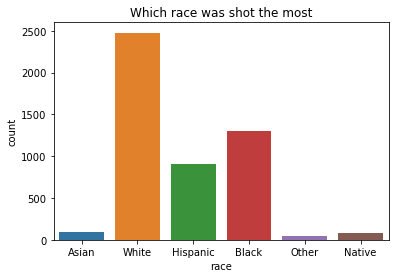

In [10]:
plt.title('Which race was shot the most')
sns.countplot(data = data, x = 'race')

In [11]:
topcity = data.city.value_counts().to_frame().reset_index()
topcity.columns = ['City','Count']
topcity = topcity[0:5]

# Top 5 city with shooting counts

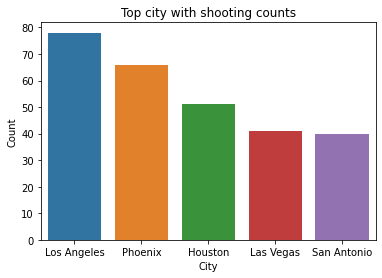

In [12]:
plt.title('Top city with shooting counts')
sns.barplot(data=topcity,x='City',y='Count')

# Was the suspect mentally ill?

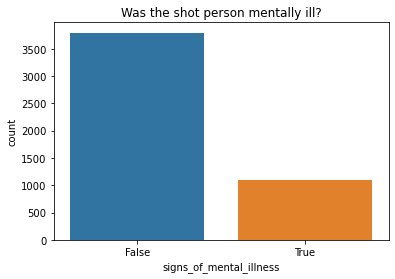

In [13]:
plt.title('Was the shot person mentally ill?')
sns.countplot(data = data, x = 'signs_of_mental_illness')

# Threat Level of the Suspect

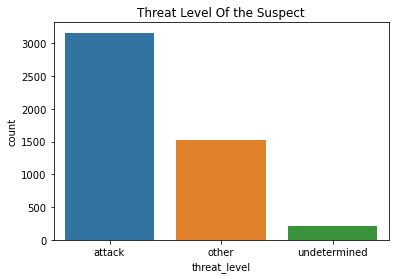

In [14]:
plt.title('Threat Level Of the Suspect')
sns.countplot(data = data, x = 'threat_level')

# Number of suspect trying to flee

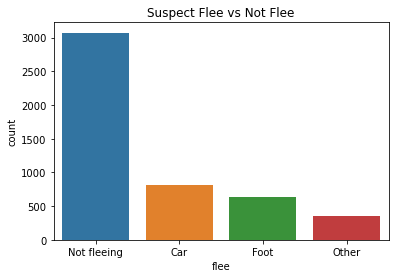

In [15]:
plt.title('Suspect Flee vs Not Flee')
sns.countplot(data = data, x = 'flee')

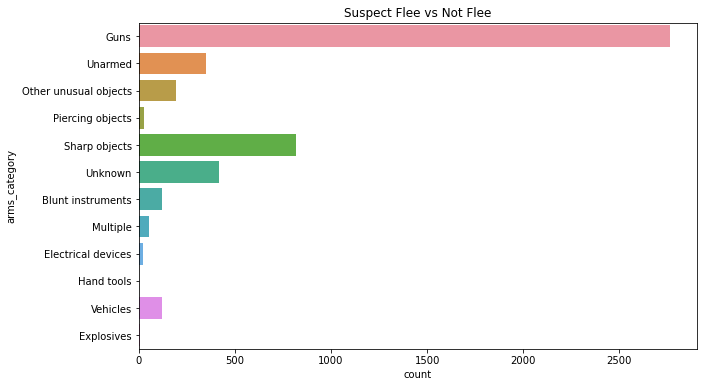

In [16]:
plt.figure(figsize=(10,6))
plt.title('Suspect Flee vs Not Flee')
sns.countplot(data = data, y = 'arms_category')

# Manner of death

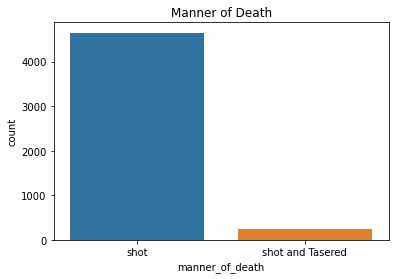

In [17]:
plt.title('Manner of Death')
sns.countplot(data = data, x = 'manner_of_death')

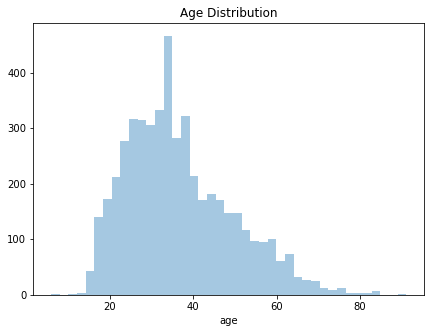

In [18]:
plt.figure(figsize=(7,5))
plt.title('Age Distribution')
sns.distplot(data['age'],kde = False)

In [19]:
monthlydeaths = data.groupby(['month_year'])['name'].count().reset_index()
monthlydeaths.columns = ['month_year', 'count']
monthlydeaths['month_year'] = monthlydeaths['month_year'].astype(str)

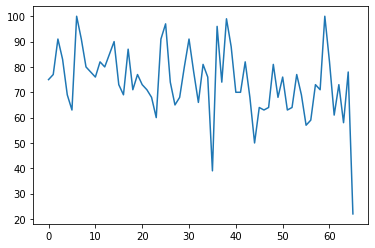

In [20]:
sns.lineplot(data=monthlydeaths['count'])